<a href="https://colab.research.google.com/github/ekqlsrla/ESAA-2/blob/main/HW/1202_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_CH3_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **파이썬 딥러닝 텐서플로**
---

## **| 06** 모델 저장 및 불러오기

In [1]:
import tensorflow as tf

#mnist 데이터 셋 로드
mnist = tf.keras.datasets.mnist

(x_train,y_train), (x_test,y_test) = mnist.load_data()

#데이터 정규화
x_train = x_train/x_train.max()
x_test = x_test / x_test.max()

11490434/11490434 [==============================] - 0s 0us/step


In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(64,activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

#모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#모델 훈련
model.fit(x_train, y_train,
            validation_data=(x_test, y_test), 
            epochs=10, 
            )

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2346 - accuracy: 0.9305 - val_loss: 0.1132 - val_accuracy: 0.9648
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0954 - accuracy: 0.9706 - val_loss: 0.0924 - val_accuracy: 0.9724
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0666 - accuracy: 0.9789 - val_loss: 0.0826 - val_accuracy: 0.9753
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0503 - accuracy: 0.9841 - val_loss: 0.0805 - val_accuracy: 0.9764
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0398 - accuracy: 0.9872 - val_loss: 0.0766 - val_accuracy: 0.9795
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0326 - accuracy: 0.9892 - val_loss: 0.0753 - val_accuracy: 0.9786
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0292 - accuracy: 0.9903 - val_loss: 0.0754 - val_ac

### 6-1 모델을 파일로 저장

1. `save` 메소드 사용
  * 모델이 저장되는 형식 : HDF5 / SavedModel


In [13]:
#모델을 h5 포맷으로 저장
model.save('h5-model.h5')

### 6-2 저장된 모델 복원

1. `tensorflow.kerase.models.load_model()` : 저장된 모델 복원

In [14]:
#모델 복원

h5_model = tf.keras.models.load_model('h5-model.h5')
h5_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 dense_13 (Dense)            (None, 64)                16448     
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


In [15]:
#모델 검증

loss, acc = h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5 model] loss:{loss:.5f}, acc: {acc:.5f}')

h5 model] loss:0.09344, acc: 0.97860


In [17]:
#모델을 SavedModel 포맷으로 저장

model.save('saved_model')

In [18]:
#모델 복원

saved_model = tf.keras.models.load_model('saved_model')
saved_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 dense_13 (Dense)            (None, 64)                16448     
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


In [20]:
#모델 검증(HDF5 포맷)

loss,acc = h5_model.evaluate(x_test,y_test,verbose = 0)
print(f"h5 model] loss : {loss:.5f}, acc: {acc:.5f}")

#모델 검증(SavedModel 포맷)

loss,acc = saved_model.evaluate(x_test,y_test,verbose = 0)
print(f"saved_model] loss : {loss: .5f}, acc : {acc:.5f}")

h5 model] loss : 0.09344, acc: 0.97860
saved_model] loss :  0.09344, acc : 0.97860


---
## **| 07** 복잡한 모델 생성


### 7-1 함수형 API(Functional API)

* [그림 3-30]와 같이 함수의 **입력 매개변수를 여러 개 갖는** 다중 입력, 함수의 return 값을 여러개 갖는 다중 출력, 같은 레벨에 여러 개의 층을 배치하여 입력과 출력을 공유하는 구조도 가능

* **Sequential API**를 사용하는 경우 단방향의 Sequential 모델만 ㅜㄱ현할 수 있다는 제약이 있음 -> `데이터 흐름이 특정 레이어를 건너뛰거나, 병합 및 분리하는 등의 구조의 모델 구현`

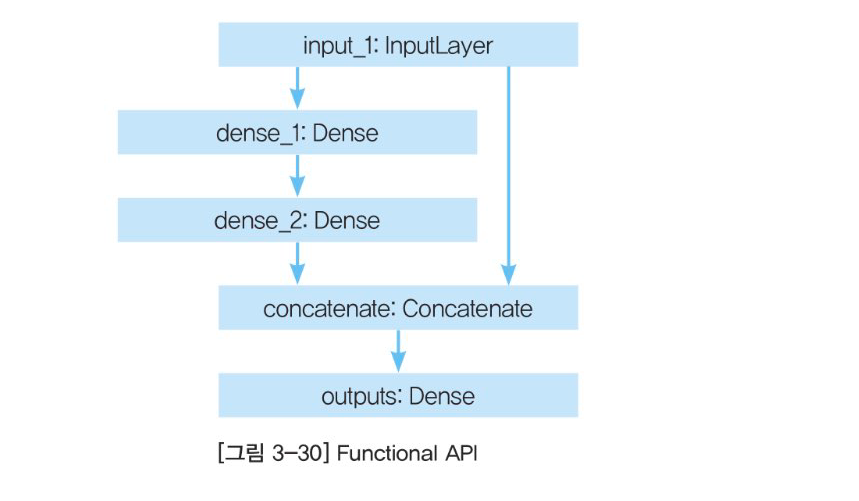

* **함수형 API**를 사용하기 위해서는 먼저 **Input 레이어**를 정의
  * 레이어마다 반환되는 출력 값을 변수에 저장한 뒤 다음 레이어의 입력으로 연결

In [22]:
input_layer = tf.keras.Input(shape = (28,28), name = 'InputLayer')

#모델의 레이어를 체인구조로 연결
x1 = tf.keras.layers.Flatten(name = 'Flatten')(input_layer)
x2 = tf.keras.layers.Dense(256, activation = 'relu', name = 'Dense1')(x1)
x3 = tf.keras.layers.Dense(64, activation = 'relu', name = 'Dense2')(x2)
x4 = tf.keras.layers.Dense(10, activation  = 'softmax', name = 'OutputLayer')(x3)

In [23]:
#모델 생성
func_model = tf.keras.Model(inputs = input_layer, outputs = x4, name = 'FunctionalModel')

In [24]:
#모델 요약
func_model.summary()

Model: "FunctionalModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 28, 28)]          0         
                                                                 
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense1 (Dense)              (None, 256)               200960    
                                                                 
 Dense2 (Dense)              (None, 64)                16448     
                                                                 
 OutputLayer (Dense)         (None, 10)                650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


* 모델의 구조도 시각화 : `summary()`
  * `show_shapes = True` : 데이터의 입출력 shape 출력
  * `show_layer_names = True` : 레이어의 이름 출력

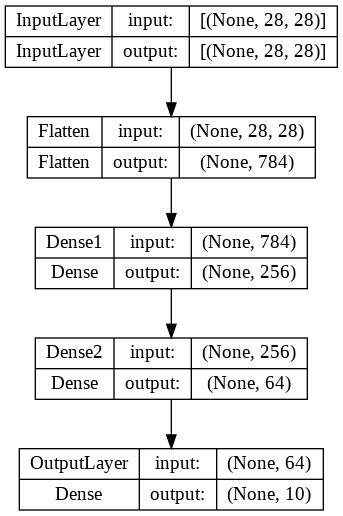

In [26]:
from tensorflow.keras.utils import plot_model

#구조도 시각화
plot_model(func_model, show_shapes = True, show_layer_names = True, to_file = 'model.png')

In [27]:
#컴파일

func_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
                   metrics = ['accuracy'])

#훈련
func_model.fit(x_train, y_train, epochs = 3)

#검증
loss,acc = func_model.evaluate(x_test, y_test, verbose = 0)
print(f'Functional Model] loss : {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2120 - accuracy: 0.9380
Epoch 2/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0879 - accuracy: 0.9733
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0609 - accuracy: 0.9804
Functional Model] loss : 0.07934, acc: 0.97580


### 7-2 모델 서브클래싱

* tf.keras.Model를 상속받아 생성하고자 하는 모델 클래스 구현
* `__init__()` 함수에 레이어를 정의하고 레이어의 하이퍼 파라미터 정의


In [29]:
class MyModel(tf.keras.Model) :
  def __init__ (self) :
    super(MyModel, self).__init__()
    #초기값 설정
    self.flatten = tf.keras.layers.Flatten()
    self.dense1 = tf.keras.layers.Dense(256, activation = 'relu')
    self.dense2 = tf.keras.layers.Dense(64, activation = 'relu')
    self.dense3 = tf.keras.layers.Dense(10,activation = 'softmax')

  def call(self,x) :
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.dense2(x)
    x = self.dense3(x)
    return x

In [30]:
#모델 생성
mymodel = MyModel()

#모델의 이름 설정
mymodel._name = 'subclass_model'

#모델 input 정의
mymodel(tf.keras.layers.Input(shape = (28,28)))

#모델 요약
mymodel.summary()

Model: "subclass_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         multiple                  0         
                                                                 
 dense_16 (Dense)            multiple                  200960    
                                                                 
 dense_17 (Dense)            multiple                  16448     
                                                                 
 dense_18 (Dense)            multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [31]:
#모델 컴파일
mymodel.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

#훈련
mymodel.fit(x_train,y_train,epochs = 3)

#검증
loss,acc = mymodel.evaluate(x_test, y_test, verbose = 0)
print(f'Subclassing Model] loss : {loss:.5f} , acc : {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2188 - accuracy: 0.9344
Epoch 2/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0871 - accuracy: 0.9730
Epoch 3/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0609 - accuracy: 0.9804
Subclassing Model] loss : 0.08450 , acc : 0.97460


### 7-3 서브클래싱 모델 파라미터를 활용한 생성

* 생성자 파라미터로 모델 내부 레이어의 하이퍼 파라미터를 지정할 수 있음


In [32]:
class MyModel(tf.keras.Model) :
  #생성자 파라미터 추가
  def __init__(self, units, num_classes) :
    super(MyModel, self).__init__()
    #초기값 설정
    self.flatten = tf.keras.layers.Flatten()
    self.dense1 = tf.keras.layers.Dense(units, activation = 'relu')
    self.dense2 = tf.keras.layers.Dense(units/4, activation = 'relu')
    self.dense3 = tf.keras.layers.Dense(num_classes, activation = 'softmax')

  
  #class overiding
  def call(self, x) :
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.dense2(x)
    x = self.dense3(x)
    return x

In [33]:
#모델 생성
mymodel = MyModel(256,10)

#모델 input 정의
mymodel(tf.keras.layers.Input(shape = (28,28)))

#모델 요약
mymodel.summary()

Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         multiple                  0         
                                                                 
 dense_19 (Dense)            multiple                  200960    
                                                                 
 dense_20 (Dense)            multiple                  16448     
                                                                 
 dense_21 (Dense)            multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [34]:
#컴파일
mymodel.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#훈련
mymodel.fit(x_train,y_train,epochs = 3)

#검증
loss,acc = mymodel.evaluate(x_test, y_test, verbose = 0)
print(f'Subclassing Model w.parameters ] loss : {loss:.5f}, acc : {acc:.5f}')


Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2100 - accuracy: 0.9368
Epoch 2/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0870 - accuracy: 0.9729
Epoch 3/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0603 - accuracy: 0.9816
Subclassing Model w.parameters ] loss : 0.07705, acc : 0.97670
